# Implementations for Berlin-Tiergarten Network

These implementations are part of the Bachelor Thesis Computing Traffic Equilibria using Nearest Extreme Point Oracle. All of the implementations below besides the functions used to import and process the data, have been done by Alexander Fleck, and are to be understood as supporting material for the aforementioned thesis.

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import openmatrix as omx
import matplotlib.pyplot as plt 

In [2]:
# Assume you have not changed the relative paths after cloning the repository
root = os.path.dirname(os.path.abspath('.'))
root

'C:\\Users\\alexa\\Alex\\Uni\\BACHELOR THESIS'

In [3]:
# We list all folders available, most of which are TNTP instances
folders = [x for x in os.listdir(root)[1:] if os.path.isdir(os.path.join(root, x))]

In [4]:
# Function to import OMX matrices
def import_matrix(matfile):
    f = open(matfile, 'r')
    all_rows = f.read()
    blocks = all_rows.split('Origin')[1:]
    matrix = {}
    for k in range(len(blocks)):
        orig = blocks[k].split('\n')
        dests = orig[1:]
        orig=int(orig[0])

        d = [eval('{'+a.replace(';',',').replace(' ','') +'}') for a in dests]
        destinations = {}
        for i in d:
            destinations = {**destinations, **i}
        matrix[orig] = destinations
    zones = max(matrix.keys())
    mat = np.zeros((zones, zones))
    for i in range(zones):
        for j in range(zones):
            # We map values to a index i-1, as Numpy is base 0
            mat[i, j] = matrix.get(i+1,{}).get(j+1,0)

    index = np.arange(zones) + 1
    return mat
   

In [5]:
# If we want to import all matrices in place
for f in folders:
    mod = os.path.join(root, f)
    mod_files = os.listdir(mod)

    for i in mod_files:
        #print(f.upper())
        if 'TRIPS' in i.upper() and i.lower()[-5:]=='.tntp':
            print('    trips')
            source_file = os.path.join(mod, i)
            import_matrix(source_file)

In [6]:
# Importing the networks into a Pandas dataframe consists of a single line of code
# but we can also make sure all headers are lower case and without trailing spaces

netfile = os.path.join(root,'Berlin','berlin-tiergarten_net.tntp.txt')
net = pd.read_csv(netfile, skiprows=8, sep='\t')

trimmed= [s.strip().lower() for s in net.columns]
net.columns = trimmed

# And drop the silly first andlast columns
net.drop(['~', ';'], axis=1, inplace=True)

In [7]:
net['term_node']
2521/(1020-(201-110))
b=(1020-(201-110))

In [8]:
Processed_Network=net

In [9]:
np.sum(net['length'].to_numpy())

88318.0

In [10]:
Processed_Network

,init_node,term_node,capacity,length,free_flow_time,b,power,speed,toll,link_type
0,1,170,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
1,1,269,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
2,1,329,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
3,1,348,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
4,2,204,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
761,360,119,2800.0,41.0,5.333333,1.0,4.0,0.0,0.0,1
762,360,132,2800.0,27.0,2.000000,1.0,4.0,0.0,0.0,1
763,361,34,600.0,327.0,12.333333,1.0,4.0,0.0,0.0,1
764,361,43,2800.0,363.0,14.000000,1.0,4.0,0.0,0.0,1


In [11]:
matfile='berlin-tiergarten_trips.tntp.txt'

f = open(matfile, 'r')
all_rows = f.read()
blocks = all_rows.split('Origin')[1:]
matrix = {}
for k in range(len(blocks)):
    orig = blocks[k].split('\n')
    dests = orig[1:]
    orig=int(orig[0])

    d = [eval('{'+a.replace(';',',').replace(' ','') +'}') for a in dests]
    destinations = {}
    for i in d:
        destinations = {**destinations, **i}
    matrix[orig] = destinations
zones = max(matrix.keys())
mat = np.zeros((zones, zones))
for i in range(zones):
    for j in range(zones):
        # We map values to a index i-1, as Numpy is base 0
        mat[i, j] = matrix.get(i+1,{}).get(j+1,0)

index = np.arange(zones) + 1
print(type(matrix))

<class 'dict'>


In [12]:
D=import_matrix('berlin-tiergarten_trips.tntp.txt')

In [13]:
np.shape(D)

(26, 26)

only the first 26 nodes are origins, destinations !!!

The other nodes are transit nodes, that means $D_i=0,0,...,0$ and
for any other node $j$ $D_{ji}=0,...,0$

In [14]:
D1=np.zeros((26,361-26))
D=np.hstack((D,D1))

D2=np.zeros((361-26,361))
D=np.vstack((D,D2))

In [15]:
print(np.shape(D))


(361, 361)


In [16]:
D

array([[ 0.  , 22.59, 18.32, ...,  0.  ,  0.  ,  0.  ],
       [22.5 ,  0.  , 41.82, ...,  0.  ,  0.  ,  0.  ],
       [18.25, 42.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

We also process the optimal Solution to help validate our results

In [17]:
#print(D)
#n=1020-(201-110)
#Optimal=open('berlin-tiergarten_flow.tntp.txt').readlines()
#Optimal_flow=np.zeros((n,n))
#Optimal_cost=np.zeros((n,n))
#Pandasframe=[]
#for i in Optimal:
 #   line=i[:-1].split('\t')
  #  Pandasframe.append(line)
#COLUMNS=Pandasframe[0]
#Pandasframe=pd.DataFrame(Pandasframe[1:],columns=Pandasframe[0])
    

In [18]:
n=361
B=np.zeros((n,n))
free_flow=np.zeros((n,n))
C=np.zeros((n,n))
P=np.zeros((n,n))
b=np.zeros((n,n))
toll=np.zeros((n,n))
length=np.zeros((n,n))
Edges1=[]
Link_travel_Time=np.zeros((n,n))
Optimal_flow=np.zeros((n,n))
Optimal_cost=np.zeros((n,n))
speed=np.zeros((n,n))
toll=np.zeros((n,n))
link_type=np.zeros((n,n))
power=np.zeros((n,n))


#Of1=Pandasframe[COLUMNS[2]]
#Oc1=Pandasframe[COLUMNS[3]]
B1=Processed_Network['init_node'].to_numpy()-1
B2=Processed_Network['term_node'].to_numpy()-1
c1=Processed_Network['capacity']
a1=Processed_Network['free_flow_time']
p1=Processed_Network['power']
s1=Processed_Network['speed']
t1=Processed_Network['toll']
link_type1=Processed_Network['link_type']
b1=net['b']
l=0
j=0

while j< len(B1):
   
    if int(B1[j])==l:
        
        init=int(B1[j])
        term=int(B2[j])
            
        B[init][term]=0.15
        free_flow[init][term]=float(a1[j])
        C[init][term]=float(c1[j])
        P[init][term]=float(p1[j])
        speed[init][term]=float(s1[j])
        toll[init][term]=float(t1[j])
       
        power[init][term]=float(p1[j])
        b[init][term]=float(b1[j])

        #free_flow[init][term]*0.15/(C[init][term]**4) 
        #Optimal_flow[int(B1[j])-1][int(B2[j])-1]=float(Of1[j])
        #Optimal_cost[int(B1[j])-1][int(B2[j])-1]=float(Oc1[j])
        Edges1.append([init,term])
       
        j=j+1
    else:
    
        l=l+1    


In [19]:
c1

0      999999.0
1      999999.0
2      999999.0
3      999999.0
4      999999.0
         ...   
761      2800.0
762      2800.0
763       600.0
764      2800.0
765       900.0
Name: capacity, Length: 766, dtype: float64

# Solving the call for the Oracle 

Having presented both the formulation of the problem and the algorithm we will first use to solve it, we now get to discuss how to implement the algorithm efficiently. Since the main difficulty for the implementation of the Frank-Wolfe Method in this case, relies on how to solve the call for the oracle we will discuss this first.
As seen in section 1.3 the Frank-Wolfe Algorithm solves in every iteration the subproblem 
\begin{equation}
\begin{aligned}
& \underset{v\in \mathcal{V}}{\text{min}}
& & v^\top\nabla f(x)  
\end{aligned}
\end{equation}
which for our case is given by 
\begin{equation}
\begin{aligned}
& \underset{g(y)=0}{\underset{y\geq 0}{\text{min}}}
& & \sum_{(i,j)\in A}\sum_{s=1}^p c_{ij}y_{ij}^s\geq\sum_{s=1}^p & \underset{g(y)=0}{\underset{y\geq 0}{\text{min}}}
& & \sum_{(i,j)\in A}c_{ij}y_{ij}^s
\end{aligned}
\end{equation}
Where $g$ ensures that the flow circulation constraints are satisfied REFER TO THE CONSTRAINTS.
This allows us to solve the call for the oracle by solving the subproblem one block at a time, which means minimizing the cost of sending $D_{js}$ units of flow for all nodes $j$ to node $s$. This can be done using the Dijkstra algorithm using the costs  $c_{ij}$ as distances between nodes. This strategy does not violate the constraints imposed by $g$ . Finally we only need to sum up the solutions of the individual blocks to obtain the direction we will then minimize along.

aasaasa

In [20]:
def smallest_distance(unvisited_Network):
    '''
    

    Parameters
    ----------
    unvisited_Network : List
        Contains all unvisited Nodes .

    Returns
    -------
    a : Node
        looks among all unvisited Nodes for the one with smallest Distance to the initial .
.

    '''
    a=unvisited_Network[0]
    for i in unvisited_Network:
        if not i.Visited:
            if i.Distance<a.Distance:
                a=i
    return a
def Notallvisited(Network):
    if Network.unvisited_Network!=[]:
        return True 

def Dijkstra(Network,x0):
    '''
    dijkstra Algorithm with a modification
    '''
    for i in Network.Nodes[:26]:
        if i.key!=x0.key:
            for j in i.Edges:
                j.blocked_cost=j.Cost
                j.Cost=np.inf

    Network.unvisited_Network=list(Network.Nodes)
    
    
    for i in Network.Nodes:
        if not i==x0:
            i.Distance=np.inf
            i.Predecessor=None
        else:
            i.Distance=0
            i.Predecessor=None 
            
    while Notallvisited(Network):
        #print(len(Network.Nodes))
        
        a=smallest_distance(Network.unvisited_Network)
        Network.unvisited_Network.remove(a)
        #Network.unvisited_Network.remove(a)
        for j in a.Edges:
            #j is an Edge a=(0,1) and has the attribute cost
            #print(j.Tuple[1],'Index')
            #print(len(Network.Nodes))
            if Network.Nodes[j.Tuple[1]].Visited==False:
                if Network.Nodes[j.Tuple[1]].Distance>j.Cost+a.Distance:
                   Network.Nodes[j.Tuple[1]].Distance=j.Cost+a.Distance
                   Network.Nodes[j.Tuple[1]].Predecessor=a
    
    for i in Network.Nodes[:26]:
        if i.key!=x0.key:
            for j in i.Edges:
                j.Cost=j.blocked_cost
                j.blocked_cost=0

    Network.unvisited_Network=list(Network.Nodes)
    
            
        

In [21]:
class Edge:
    def __init__(self,Tuple,Cost ):
        self.Tuple=Tuple
        self.Cost=Cost
        self.blocked_Cost=0
    
class Node:
    def __init__(self,Edges,Distance,key):
        self.Edges=Edges
        self.Distance=0
        self.key=key
        self.Predecessor=None
        self.Visited=False
    def print_edges(self):
        print('Edges outgoing from Node ',self.key+1)
        for i in self.Edges:
            print(i.Tuple+np.ones(2))

class Class_Network:
    def __init__(self,Nodes,Edges ):
        '''
        Nodes is a list of objects_nodes
        
        
        '''
        self.Nodes=Nodes
        self.unvisited_Network=list(Nodes)
        self.Edges=list(Edges)
#class Residual_Network:
    
        

In [22]:
n

361

In [23]:


def Initialize_Network(xk):
    '''
    The Link Travel Time is the Gradient in xk
    Iterate over all of the nodes 
    for node_i:
        set a list of Edges going from (i,other)
        
        
        
    '''
    n=361
    #print('Initialize Network')
    Y=np.zeros((n,n))
    
    Link_travel_Time=free_flow+b*xk**power
   
    Nodes=[ ]

    
    for j in range(n):
        Edges=[] 
      
            
        current=Processed_Network. loc[Processed_Network['init_node'] == j+1]
        

        for i in current['term_node']:

                    
                 
                    Edges.append(Edge(np.array([j,int(i)-1]),Link_travel_Time[j,int(i)-1]))
                    
        Nodes.append(Node(Edges,0,j))

    Network=Class_Network(Nodes,Edges1)
    
    return Network

In [24]:
x0=np.zeros((n,n))
T=20
Network=Initialize_Network(x0)

In [25]:
x0

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
K=0
for i in Network.Nodes:
    
    assert i.key==K
    K+=1

In [27]:
np.max(b)

1.0

# Testing the Dijkstra and the Network 

In [28]:
def Fortran_Op(y,Network,Start):
    #print('Fortran')
    #for i in Network.Nodes:
        #print(i.Predecessor)
    
    #print('Start',Start)

    for j in Network.Nodes[:26]:
        


            Current_Node=j

            while Current_Node!=Start:

                y[Current_Node.Predecessor.key][Current_Node.key]+=D[j.key][Start.key]
                #print(D[j.key][Start.key],'D')
                Current_Node=Current_Node.Predecessor

        

In [29]:
def Oracle(xk):
    Y=np.zeros((n,n))
    Network=Initialize_Network(xk)
    
    s=0
    Start=Network.Nodes[s]
    while s<26:
    
        #print(s,len(Network.Nodes),s<24)
        Start=Network.Nodes[s]
        Dijkstra(Network,Start)
        Fortran_Op(Y,Network,Start)
        s=s+1
        
        
    return Y

    
    
    
    
    
    
    

# Actual Frank-Wolfe Algorithm 

In [30]:
def Initial():
        '''
        gives us an Initial feasible starting Point, by 
        sending all of the flow between every Od-pair through the 
        cheapest route in terms of free flow travel time 
        '''
     
        xk=np.zeros((n,n))
        Network=Initialize_Network(xk)
    

        s=0
        Start=Network.Nodes[s]
        while Start.key<26:
            
            Dijkstra(Network,Start)
            Fortran_Op(xk,Network,Start)
            s=s+1
            Start=Network.Nodes[s+1]
        return xk


In [31]:
def Objective(x):
    Link_cost=free_flow*x+x**(power+1)*(np.where(power>0,b/(power+1),0))
    Link_cost1=free_flow+b*x**4
    
    return np.sum(Link_cost)


# Stepsizes

In [32]:
def stepsize(w,xk):
    I=[0,1]
    for i in range(1000):
        x1=(I[0]+I[1])/4
        x2=(I[0]+I[1])/4*3
        xk1=x0+x1*(w-xk)
        xk2=x0+x2*(w-xk)
        if Objective(xk1)<Objective(xk2):
            I[1]=x2
        elif Objective(xk1)==Objective(xk2):
            I[0]=x1
            I[1]=x2
        else:
            I[0]=x1
    return (I[1]+I[0])/2

def stepsize1(i)  :     
    return 1/(i+1)
def stepsize2(w,xk):
    i=0
    alpha_i=1/(i+1)
    current=xk
    while Objective(current+alpha_i*(w-current))<Objective(current):
        i+=1
        print(i)
        alpha_i=1/(i+1)
        current=current+alpha_i*(w-current)
    return alpha_i    
        
def stepsize3(w,xk):
    alpha_i=np.arange(1000)/1000
    List=[]
    for i in alpha_i:
        
                     
        List.append(Objective(xk+i*(w-xk)))
        
    return alpha_i[np.argmin(List)]
def stepsize_NEP(Stepi,current,new):
    
    '''
    Stepsize proposed in NEP
    '''
    if Objective(current)>Objective(new):
        return Stepi
    else: 
        return 0

def line_search(x,v):
    '''
    computes a stepsize using a line search with an error of 1/20 
    '''
    value_small=Objective(x)
    stepsize_final=1/2
    direction=1
    for i in range(2,20):      
        if value_small>Objective(x+(stepsize_final+direction*1/i)*(v-x)):
        
            #if the value decreases when going to the right 
            value_small=Objective(x+(stepsize_final+direction*1/i)*(v-x))
            stepsize_final+=direction*1/i
        else:
            direction=-direction
            #if the value does not decrease when going to the right, go left 
            value_small=Objective(x+(stepsize_final+direction*1/i)*(v-x))
            stepsize_final+=direction*1/i
    return stepsize_final

In [33]:

def Frank_Wolfe(xk,T):
    i=0
    A=np.zeros(T)
    while i<T:
        
        w=Oracle(xk)
        #print(np.argwhere(w-xk!=0),'atetntion')
        #print('ready0')
        alpha_i=stepsize1(i)
        alpha_i=line_search(xk,w)
        print(i,Objective(xk))
        A[i]=Objective(xk)
        
        #last=xk
        #print(w)
        xk=xk+alpha_i*(w-xk)
        
        i=i+1
        print(i,Objective(xk))
        #if np.linalg.norm(last-xk)<20:
        #   return xk
    return xk,A

In [34]:
x0=Initial()
print('Initialready')

Initialready


In [35]:

print('Initialready')
#x0=np.zeros((n,n))
T=20
Network=Initialize_Network(x0)
Result=Frank_Wolfe(x0,T)


Initialready
0 1.2329639861263986e+16
1 4333529469848436.5
1 4333529469848436.5
2 2682628088013295.0
2 2682628088013295.0
3 2003092656146753.2
3 2003092656146753.2
4 1675829218681814.8
4 1675829218681814.8
5 1445051721823532.8
5 1445051721823532.8
6 1253188368062859.0
6 1253188368062859.0
7 1119045700304726.0
7 1119045700304726.0
8 1028365821600817.8
8 1028365821600817.8
9 978668105795195.4
9 978668105795195.4
10 952777212682387.8
10 952777212682387.8
11 916549078519628.8
11 916549078519628.8
12 883352273434061.2
12 883352273434061.2
13 859952767506941.8
13 859952767506941.8
14 822770854757022.5
14 822770854757022.5
15 795361893777596.6
15 795361893777596.6
16 783830098555479.8
16 783830098555479.8
17 766555068775664.1
17 766555068775664.1
18 750199608699702.5
18 750199608699702.5
19 741946283199462.0
19 741946283199462.0
20 723704291606046.9


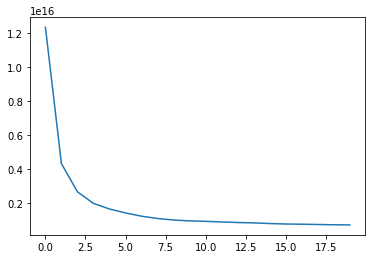

In [36]:
plt.plot(np.arange(T),Result[1])

In [37]:
#print(Optimal_flow)

print(Objective(Result[0])/1265654.92203176)
print(Objective(Result[0]))
print(np.sum(Optimal_cost))
#print(42.31335287107440)
print(Objective(Optimal_flow)/42.31335287107440)
#free_flow+b*Optimal_flow**4-Optimal_cost

571802217.9728752
723704291606046.9
0.0
0.0


# NEP Oracle 

In [38]:
def Initialize_NEP_Network(xk,lamba):
    #print('Initialize Network')
    Y=np.zeros((n,n))
    #big_Y=set_big_Y()
    
    #print(Link_travel_Time)
    Nodes=[ ]
    Link_travel_Time=free_flow+b*xk**power
    Link_travel_Time=np.ones((n,n))*100000-2*(xk-(1/(2*lamba))*Link_travel_Time)
   
   
    
    for j in range(n):
        Edges=[] 
    
        current=Processed_Network. loc[Processed_Network['init_node'] == j+1]
        

        for i in current['term_node']:
                    
                        Edges.append(Edge(np.array([j,int(i)-1]),Link_travel_Time[j,int(i)-1]))
                    
                        Edges.append(Edge(np.array([j,int(i)-1]),Link_travel_Time[j,int(i)-1]))
        Nodes.append(Node(Edges,0,j))

    Network=Class_Network(Nodes,Edges1)
    
    return Network
    

In [39]:
def NEP_Oracle(xk,lamba):
    '''
    This function will solve the call for the NEP Oracle 
    '''
    Y=np.zeros((n,n))
    Network=Initialize_NEP_Network(xk,lamba)
    
    s=0
    Start=Network.Nodes[s]
    while s<26:
        #print(s,'Inner_Oracle' )
        #print(s,len(Network.Nodes),s<24)
        Start=Network.Nodes[s]
        Dijkstra(Network,Start)
        #print_Network(Network)
        Fortran_Op(Y,Network,Start)
        s=s+1
        
        
    return Y


In [40]:

def Frank_Wolfe_NEP(xk,T,beta):
    '''
    This will be a modified version of the Standard Frank_Wolfe to test mainly the call for the Oracle 
    '''
    i=0
    lamba=beta/2
    A=np.zeros(T)
    while i<T:
        #print(i,'XK',xk)
        print(i,'Iteration')
        w=NEP_Oracle(xk,lamba)
        print('Oracle',np.sum(w))
        #stepi=stepsize1(i)
        
        #new=xk+stepi*(w-xk)
        #alpha_i=stepsize_NEP(stepi,xk,new)
        alpha_i=line_search(xk,w)
        lamba=beta*(1/(2*(i+1)))
        
        #print(alpha_i,np.linalg.norm(xk-Optimal_flow))
        A[i]=Objective(xk)
        #last=xk
        #print(xk)
        xk=xk+alpha_i*(w-xk)
        
        i=i+1
        print(i,Objective(xk))
        #if np.linalg.norm(last-xk)<20:
        #   return xk
    return xk,A

In [41]:
x0=Initial()

In [42]:

np.sum(D)

10754.869999999999

In [43]:

#print(x0/np.max(x0))
#x0=np.zeros((24,24))
#lamba=8
#Network=Initialize_NEP_Network(x0,lamba)

beta1=10**7-(10**7)/4
#beta=0.00003
#betas=[i**5 for i in range(1,10)]
Result1=Frank_Wolfe_NEP(x0,T,beta1)
#Result2=Frank_Wolfe_NEP(x0,T,beta1)

0 Iteration
Oracle 127881.68999999999
1 1656021116196492.0
1 Iteration
Oracle 118120.81999999999
2 1284426826311950.0
2 Iteration
Oracle 119188.26000000001
3 1094180207952067.4
3 Iteration
Oracle 119503.48000000001
4 1058199210747275.2
4 Iteration
Oracle 120491.49000000002
5 966665105671141.5
5 Iteration
Oracle 120534.80999999998
6 931063530762046.8
6 Iteration
Oracle 122466.81999999998
7 883118651984288.2
7 Iteration
Oracle 120872.55
8 866187753134360.2
8 Iteration
Oracle 123128.65999999997
9 820943773329191.5
9 Iteration
Oracle 122757.86999999998
10 795898754035620.4
10 Iteration
Oracle 124220.44
11 782757106196188.8
11 Iteration
Oracle 121143.77
12 772901022214460.5
12 Iteration
Oracle 126291.98999999998
13 759382948504356.4
13 Iteration
Oracle 124419.49000000002
14 743902916822888.1
14 Iteration
Oracle 124611.21999999999
15 733142693731169.2
15 Iteration
Oracle 121588.20999999999
16 727017551745764.8
16 Iteration
Oracle 124806.78
17 714582410396709.9
17 Iteration
Oracle 123515.6299

Text(0, 0.5, 'Objective')

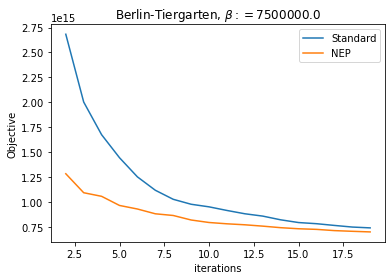

In [44]:

plt.plot(np.arange(T)[2:],Result[1][2:],label='Standard')
plt.plot(np.arange(T)[2:],Result1[1][2:],label='NEP')
plt.title('Berlin-Tiergarten, $\\beta:=$'+str(beta1))
plt.legend()
plt.xlabel('iterations')
plt.ylabel('Objective')

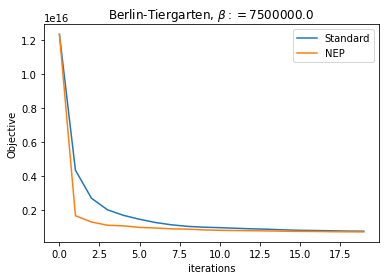

In [45]:

plt.plot(np.arange(T),Result[1],label='Standard')
plt.plot(np.arange(T),Result1[1],label='NEP')
plt.title('Berlin-Tiergarten, $ \\beta:=$'+str(beta1))
plt.legend()
plt.xlabel('iterations')
plt.ylabel('Objective')
plt.savefig("Plot_percentage_Barcelona.jpg", dpi=1000)

In [46]:
Result1[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Testing for max-percentage change in iteration

First we define the max percentage change function 

In [47]:
def max_percentage_change(X_new,X_old):
    Diff=np.abs(X_old-X_new)
    Change=np.where(X_old>0,Diff/(X_old/100),0)
    
    return np.max(Change)

In [48]:

def Frank_Wolfe_percentage(xk,T,percentage):
    i=0
    A=[]
    while i<T:
        
        w=Oracle(xk)

        alpha_i=stepsize1(i)
      
      
    
        X_old=xk
        xk=xk+alpha_i*(w-xk)
        X_new=xk

        i=i+1
        A.append(max_percentage_change(X_new,X_old))
        print(i,Objective(xk))

    return xk,A

In [49]:
def Frank_Wolfe_NEP_percentage(xk,T,beta,percentage):
    '''
    This will be a modified version of the Standard Frank_Wolfe to test mainly the call for the Oracle 
    '''
    i=0
    lamba=beta/2
    A=[]
    while i<T:
        print(i,'Iteration')
        w=NEP_Oracle(xk,lamba)
        print('Oracle',np.sum(w))
        stepi=stepsize1(i)
        
        new=xk+stepi*(w-xk)
        alpha_i=stepsize_NEP(stepi,xk,new)
        print('stepi',alpha_i)
        lamba=beta*stepi/2
        X_old=xk
        xk=xk+alpha_i*(w-xk)
        X_new=xk
        A.append(max_percentage_change(X_new,X_old))
       
        i=i+1
        print(i,Objective(xk))

    return xk,A

In [50]:
percentage=0.5
x0=Initial()
Result=Frank_Wolfe_percentage(x0,100,percentage)
x0=Initial()
Result1=Frank_Wolfe_NEP_percentage(x0,100,beta1,percentage)

<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


1 8.427019924320988e+17


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


2 3.262818899391596e+16


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


3 1.2087135636095018e+16


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


4 6409522334031496.0


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


5 3748630422021338.0


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


6 2670363197026399.5


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


7 2130630541935276.8


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


8 1811254291085451.5


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


9 1623643414949909.8


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


10 1457949359323975.2


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


11 1345066255442206.5


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


12 1257692551483004.5


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


13 1189423834979153.2


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


14 1132233936485176.5


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


15 1087064121778063.2


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


16 1051169969195686.6


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


17 1018962745960248.9


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


18 989224851538178.8


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


19 963993297812174.6


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


20 940826028047788.4


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


21 921751054155341.2


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


22 903742861746407.5


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


23 887387177956202.9


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


24 873675675481380.5


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


25 860136182562401.6


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


26 848341839807697.5


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


27 837881296540172.8


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


28 827933118789309.9


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


29 819210934231177.5


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


30 811011461966124.5


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


31 803188160665329.5


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


32 796637733982065.6


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


33 789907707624911.5


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


34 783424435069446.2


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


35 777723189819974.2


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


36 772055495452726.2


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


37 766837048079552.5


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


38 762263918723894.8


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


39 757647262546864.2


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


40 753249940873022.5


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


41 749394529883099.5


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


42 745471931040064.4


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


43 741865043159807.4


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


44 738430418497746.5


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


45 735169701905920.1


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


46 732103851401803.5


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


47 729143491243474.0


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


48 726206965557154.9


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


49 723669789306614.4


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


50 721018018869622.6


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


51 718490254660503.1


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


52 716116627191375.6


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


53 713987217502554.0


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


54 711726304494178.5


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


55 709647602529508.8


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


56 707607794663964.0


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


57 705695162802302.2


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


58 703818393489878.2


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


59 702223306654194.0


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


60 700412213125847.1


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


61 698683737836012.8


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


62 697077543831272.5


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


63 695512483694469.8


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


64 694021227223196.4


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


65 692535911725868.6


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


66 691111062432931.4


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


67 689734810582653.6


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


68 688458670019894.4


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


69 687169682082506.8


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


70 685999044324440.6


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


71 684732280895297.6


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


72 683568851311636.5


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


73 682394387950610.9


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


74 681272859579707.8


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


75 680229529240334.6


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


76 679157422469305.0


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


77 678132708705270.5


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


78 677172839771567.0


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


79 676213732509732.4


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


80 675277029319312.8


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


81 674418361241197.0


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


82 673522993057004.1


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


83 672637253783520.9


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


84 671803534737786.0


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


85 671025026734896.2


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


86 670237343568865.1


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


87 669444194301625.1


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


88 668664327905506.0


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


89 667922275614884.0


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


90 667183993566484.0


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


91 666462144901404.5


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


92 665784239705753.0


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


93 665097458359279.1


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


94 664451421436173.1


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


95 663851913605094.2


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


96 663210658351606.6


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


97 662593801166660.1


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


98 661971169950319.2


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


99 661372418562869.6


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


100 660800045581961.9
0 Iteration
Oracle 127881.68999999999
stepi 1.0
1 9986715503810866.0
1 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 127956.85999999999
stepi 0.5
2 2694050408528432.0
2 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 120421.65000000001
stepi 0.3333333333333333
3 1476736404348848.0
3 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 120698.22
stepi 0.25
4 1227034325896683.5
4 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 121375.31999999999
stepi 0.2
5 1082592764961621.8
5 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 120069.84
stepi 0.16666666666666666
6 1006739019844423.6
6 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 121719.86
stepi 0.14285714285714285
7 954428544191254.5
7 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 120816.38999999998
stepi 0.125
8 925937077794990.8
8 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 122883.29
stepi 0.1111111111111111
9 886932762280900.9
9 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 123417.68
stepi 0.1
10 857411149110351.8
10 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 122894.1
stepi 0.09090909090909091
11 836585088195910.4
11 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 123234.57
stepi 0.08333333333333333
12 818788509356579.4
12 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 122215.74999999999
stepi 0.07692307692307693
13 806263649262297.0
13 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 125400.42000000001
stepi 0.07142857142857142
14 790136714453181.5
14 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 124365.14
stepi 0.06666666666666667
15 780060335469305.8
15 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 125560.07999999999
stepi 0.0625
16 768718259510809.6
16 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 124936.05999999998
stepi 0.058823529411764705
17 758881512573821.1
17 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 124931.52000000002
stepi 0.05555555555555555
18 750789016858938.1
18 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 125066.81
stepi 0.05263157894736842
19 743488808491173.0
19 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 124236.73
stepi 0.05
20 737962440719599.4
20 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 126699.21
stepi 0.047619047619047616
21 731392141373350.6
21 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 124936.07999999999
stepi 0.045454545454545456
22 726182056963445.2
22 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 126735.46999999999
stepi 0.043478260869565216
23 720671771276463.8
23 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 125414.98000000001
stepi 0.041666666666666664
24 716323051950083.5
24 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 127243.69000000002
stepi 0.04
25 711402253072519.4
25 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 126329.8
stepi 0.038461538461538464
26 707965485035553.6
26 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 128164.64
stepi 0.037037037037037035
27 703438617468725.1
27 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 125715.64
stepi 0.03571428571428571
28 700393115036992.5
28 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 128192.28000000001
stepi 0.034482758620689655
29 696531606085122.1
29 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 126660.61
stepi 0.03333333333333333
30 693727890049020.2
30 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 129620.82999999999
stepi 0.03225806451612903
31 689864889299278.8
31 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 128234.18
stepi 0.03125
32 686974677801482.2
32 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 127669.52
stepi 0.030303030303030304
33 684415748018193.8
33 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 129820.99
stepi 0.029411764705882353
34 681269372345508.0
34 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 130157.36000000002
stepi 0.02857142857142857
35 678574693945644.4
35 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 129822.01
stepi 0.027777777777777776
36 675877463702269.6
36 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 128856.26
stepi 0.02702702702702703
37 673627118374340.0
37 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 129353.07
stepi 0.02631578947368421
38 671598635000253.1
38 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 129081.34999999996
stepi 0.02564102564102564
39 669609093175034.4
39 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 130559.96
stepi 0.025
40 667405205736421.2
40 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 130245.53999999998
stepi 0.024390243902439025
41 665378467144277.8
41 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 127998.57
stepi 0.023809523809523808
42 664083050233680.9
42 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 132840.76
stepi 0.023255813953488372
43 661734351553026.6
43 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 129568.80000000002
stepi 0.022727272727272728
44 660366335391850.5
44 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 130785.04999999997
stepi 0.022222222222222223
45 658681815700440.1
45 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 128979.97000000003
stepi 0.021739130434782608
46 657417405039540.8
46 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 130988.61000000002
stepi 0.02127659574468085
47 655899931732393.1
47 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 129206.62000000001
stepi 0.020833333333333332
48 654863764745766.8
48 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 131219.08
stepi 0.02040816326530612
49 653511710110190.1
49 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 130134.75
stepi 0.02
50 652347656061820.8
50 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 129775.11
stepi 0.0196078431372549
51 651298564149599.6
51 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 128161.16000000002
stepi 0.019230769230769232
52 650505449752374.2
52 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 131361.32
stepi 0.018867924528301886
53 649410700637751.0
53 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 127695.62999999999
stepi 0.018518518518518517
54 648711165429259.0
54 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 132121.12999999998
stepi 0.01818181818181818
55 647577155962884.1
55 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 131726.83
stepi 0.017857142857142856
56 646593905333506.6
56 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 130371.75000000001
stepi 0.017543859649122806
57 645685721565797.2
57 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 132394.6
stepi 0.017241379310344827
58 644641689875091.6
58 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 128175.46999999999
stepi 0.01694915254237288
59 644107207909091.4
59 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 134268.61
stepi 0.016666666666666666
60 643043009716793.8
60 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 129775.79000000001
stepi 0.01639344262295082
61 642371219277868.4
61 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 129637.72
stepi 0.016129032258064516
62 641752611782698.0
62 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 129791.65999999999
stepi 0.015873015873015872
63 641194135600705.0
63 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 133553.79
stepi 0.015625
64 640319565224155.2
64 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 129751.27999999998
stepi 0.015384615384615385
65 639735800468777.9
65 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 130873.51
stepi 0.015151515151515152
66 639125768949904.0
66 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 131676.88
stepi 0.014925373134328358
67 638480349761011.6
67 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 130335.90999999997
stepi 0.014705882352941176
68 637951244492262.1
68 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 131711.63999999998
stepi 0.014492753623188406
69 637315151271738.6
69 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 131549.06999999998
stepi 0.014285714285714285
70 636727957006611.1
70 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 131195.67
stepi 0.014084507042253521
71 636181617327063.6
71 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 131809.32
stepi 0.013888888888888888
72 635624986727263.6
72 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 132296.97
stepi 0.0136986301369863
73 635051065094536.9
73 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 131117.32
stepi 0.013513513513513514
74 634553554637018.0
74 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 131247.57
stepi 0.013333333333333334
75 634081954515279.5
75 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 129720.20999999999
stepi 0.013157894736842105
76 633741131361232.5
76 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 131436.17999999996
stepi 0.012987012987012988
77 633309241626057.1
77 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 132193.33
stepi 0.01282051282051282
78 632813649159299.9
78 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 129820.91
stepi 0.012658227848101266
79 632504253147288.6
79 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 131098.28000000003
stepi 0.0125
80 632099967428361.9
80 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 132715.21
stepi 0.012345679012345678
81 631657330560339.5
81 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 134231.19
stepi 0.012195121951219513
82 631115261463969.1
82 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 131313.69999999998
stepi 0.012048192771084338
83 630745987664825.5
83 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 130144.58000000002
stepi 0.011904761904761904
84 630482035027569.9
84 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 133680.86000000002
stepi 0.011764705882352941
85 630017901996273.9
85 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 129602.25000000001
stepi 0.011627906976744186
86 629766313094424.2
86 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 129392.48
stepi 0.011494252873563218
87 629561074896572.1
87 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 133872.48
stepi 0.011363636363636364
88 629108929054352.1
88 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 132023.71
stepi 0.011235955056179775
89 628800791592395.2
89 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 133526.41999999998
stepi 0.011111111111111112
90 628444177435344.2
90 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 130643.2
stepi 0.01098901098901099
91 628181872582306.6
91 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 133137.94
stepi 0.010869565217391304
92 627819710160093.8
92 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 130356.02
stepi 0.010752688172043012
93 627626188130021.0
93 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 132668.97
stepi 0.010638297872340425
94 627279927699977.9
94 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 131114.32
stepi 0.010526315789473684
95 627023864986843.1
95 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: divide by zero encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)
<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 130497.91000000002
stepi 0.010416666666666666
96 626814999983100.0
96 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 133217.12
stepi 0.010309278350515464
97 626490940658658.4
97 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 131710.65
stepi 0.01020408163265306
98 626231640582461.8
98 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 129688.90999999999
stepi 0.010101010101010102
99 626078922197676.0
99 Iteration


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


Oracle 131067.73999999999
stepi 0.01
100 625842867004085.0


<ipython-input-47-05c28b79c98c>:3: RuntimeWarning: invalid value encountered in true_divide
  Change=np.where(X_old>0,Diff/(X_old/100),0)


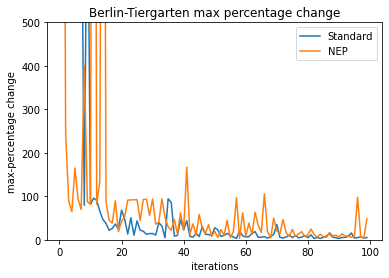

In [51]:
T=np.arange(100)
#plt.ylim(0,10)

plt.plot(T[1:],Result[1][1:],label='Standard')
plt.plot(T[1:],Result1[1][1:],label='NEP')
plt.legend()
plt.ylim(0,500)
plt.title('Berlin-Tiergarten max percentage change')
plt.ylabel('max-percentage change')
plt.xlabel('iterations')
plt.savefig("Plot_percentage_Berlin.jpg", dpi=1000)